In [4]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

T = 2.0            # final time
num_steps = 10     # number of time steps
dt = T / num_steps # time step size
alpha = 3          # parameter alpha
beta = 1.2         # parameter beta

# Create mesh and define function space
nx = ny = 8
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t',
                 degree=2, alpha=alpha, beta=beta, t=0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define initial value
u_n = interpolate(u_D, V)
# u_n = project(u_D, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2*alpha)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

<IPython.core.display.Javascript object>


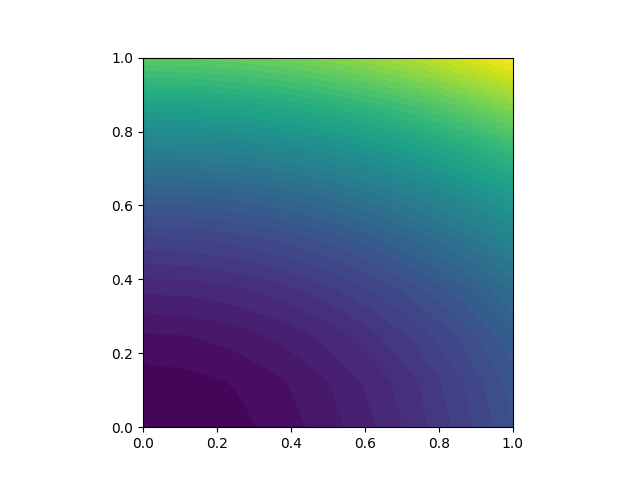

t = 0.20: error = 3.11e-15
t = 0.40: error = 2.66e-15
t = 0.60: error = 3.55e-15
t = 0.80: error = 3.55e-15
t = 1.00: error = 3.55e-15
t = 1.20: error = 4e-15
t = 1.40: error = 4.44e-15
t = 1.60: error = 3.55e-15
t = 1.80: error = 4.44e-15
t = 2.00: error = 4.44e-15


In [28]:
# Time stepping
u = Function(V)
t = 0
for n in range(num_steps):
    
    # Update current time
    t += dt
    u_D.t = t
    
    # Compute solution
    solve(a == L, u, bc)
    
    # Plot solution
    plot(u)
    
    # Compute error at vertices
    u_e = interpolate(u_D, V)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('t = %.2f: error = %.3g' % (t, error))
    
    # Update previous solution
    u_n.assign(u)